# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## Brandon Tatani - 931529

## <span style="color:blue">  Numerical exercises 8</span>

### Exercise 08.1

Write a C++ Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample a trial wave function $|\Psi_T(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$ (Suggestion: as a starting point, you can use the code you have already developed for the Hydrogen atom or the Monte Carlo NVT code). Using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
<span style="color:red">Note that to measure $\langle {\hat H} \rangle_T$ you need (analytically):</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

<Figure size 432x288 with 0 Axes>

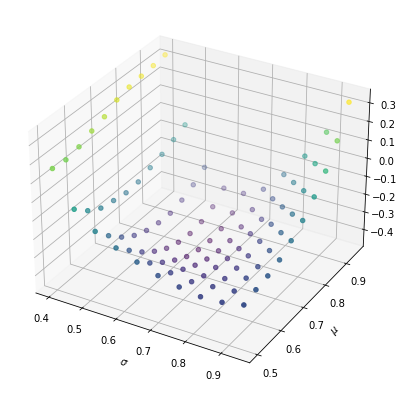

In [76]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
#loading data

mu, sigma, ene = np.loadtxt('8.1/output8_1.dat', usecols=(0,1,2), delimiter=' ', unpack='true')

#plotting data
fig = plt.figure()
plt.figure(figsize=(7,7))

ax = plt.axes(projection = '3d')
#ax.scatter3D(mu,sigma,ene, c=ene)
ax.scatter3D(sigma,mu,ene, c=ene)
plt.xlabel('$\sigma$')
plt.ylabel('$\mu$')
plt.clabel('<H>')

plt.show()

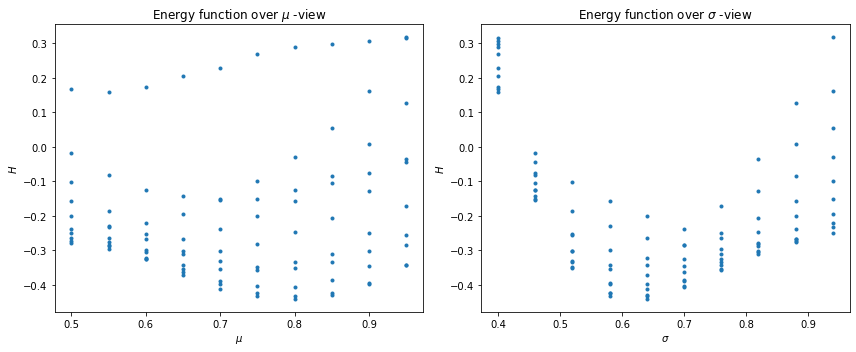

In [77]:
plt.figure(figsize=(12,5))
plt.subplots_adjust()

plt.subplot(121)
plt.plot(mu, ene, '.')
plt.title('Energy function over $\mu$ -view')
plt.xlabel('$\mu$')
plt.ylabel('$H$')
#plt.ylim([0,1])

plt.subplot(122)
plt.plot(sigma, ene, '.')
plt.title('Energy function over $\sigma$ -view')
plt.xlabel('$\sigma$')
plt.ylabel('$H$')

plt.tight_layout()
plt.show()

Looking the section views above we can assume the the minimum of $\langle\hat H(\mu,\sigma)\rangle$ is around the point $(\mu,\sigma) = (0.8,0.65)$.

In [78]:
mu, err_mu, sigma, err_sigma = np.loadtxt('8.1/config.min', delimiter=' ')

print('I parametri per il ground state sono:')
print("\u03BC = ",mu,' \u00B1 ',err_mu )
print("\u03C3 = ",sigma,' \u00B1 ',err_sigma )

I parametri per il ground state sono:
μ =  0.8  ±  0.01
σ =  0.62  ±  0.01


With a thinner research of the minimum we find out the minimum is $(\mu,\sigma) = (0.8\pm0.01,0.62\pm0.01)$

### Exercise 08.2
- As usual, <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps for the set of parameters which minimize $\langle {\hat H} \rangle_T$

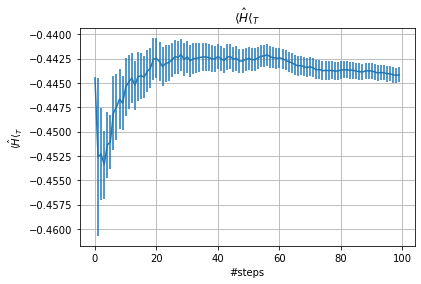

In [57]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#loading data

n, H, err_H = np.loadtxt('8.2/output8_3.dat', usecols=(0,1,2), delimiter=' ', unpack='true')

#ploting data
plt.errorbar(n, H, yerr=err_H)
plt.title('$ \langle{\hat H} \langle_T  $')
plt.xlabel('#steps')
plt.ylabel('$ \langle{\hat H}\langle_T  $')
plt.grid()
plt.show()

- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation

In [10]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

In [62]:
#loading data
gen = np.loadtxt('8.2/config.final')

In [63]:
from scipy.optimize import curve_fit
import math

dy, bins = np.histogram(gen, bins=100, density=True)
dx = np.zeros(100)
for i in range(100):
    dx[i] = (bins[i] + bins[i+1])*0.5
    
def gaussian(x, mu, sigma, N):
    return N*(np.exp(-0.5*((x-mu)/sigma)**2) + np.exp(-0.5*((x+mu)/sigma)**2))

popt, conv = curve_fit(gaussian, dx, dy)
print("i parametri per il fit sono:", popt)

i parametri per il fit sono: [0.71578173 0.48740495 0.41157282]


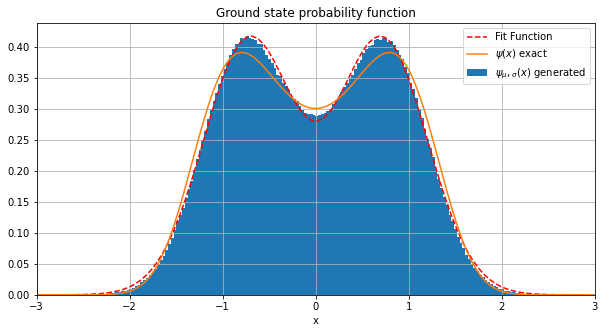

In [64]:
#plotting data
plt.figure(figsize=(10,5))
plt.hist(gen, bins=200, density=True, label='$\psi_\mu,_\sigma (x)$ generated')
plt.plot(dx, gaussian(dx, *popt), 'r--', label='Fit Function')
plt.plot(x,(psi[0])**2, label='$\psi (x)$ exact')
plt.title("Ground state probability function")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
#plt.ylim((-0.6,0.6))
plt.legend()
plt.show()